# Theme of this notebook - Efficiency Frontier
* The definition of efficiency frontier:<br>
<b>Efficient frontier</b> is a set of optimal portfolios expected to give the highest return with a minimal volatility. It dipicts the risk-return trade-off of a portfolio. <br>
This frontier is formed by plotting the <b>expected return</b> on the y-axis and the <b>standard deviation</b> as a measure of risk on the x-axis.
* Let's create efficiency frontier throughout solving sample questions.

# Note: Markowitz Portfolio Optimization

Markowitz portfolio optimization solves the optimization problem

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w \in {\cal W},
\end{array}

where $w \in {\bf R}^n$ is the optimization variable, $\cal W$ is a set of allowed portfolios (e.g., ${\cal W} = {\bf R}_+^n$ for a long only portfolio), and $\gamma >0$ is the risk aversion parameter.

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the <b>risk-adjusted return</b>. Varying $\gamma$ gives the optimal <b>risk-return trade-off</b>.
We can get the same risk-return trade-off by fixing return and minimizing risk.

# Sample problem
Compute and plot the optimal risk-return trade-off for  10  assets by using the numpy.random function, restricting ourselves to a long only portfolio.

In [20]:
# Import libraries
import numpy as np
import scipy.sparse as sp
import scipy.stats as spstats
import cvxpy as cp
import matplotlib.pyplot as plt

In [21]:
# Generate data for long only portfolio optimization.
np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
sigma = np.random.randn(n, n)
sigma = sigma.T.dot(sigma)

In [22]:
# Long only portfolio optimization.
w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T @ w
risk = cp.quad_form(w, sigma)
prob = cp.Problem(cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1, w >= 0])

In [23]:
# Compute trade-off curve.
sample_size = 100
risk_data = np.zeros(sample_size)
ret_data = np.zeros(sample_size)
gamma_vals = np.logspace(-2, 3, num=sample_size)
for i in range(sample_size):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

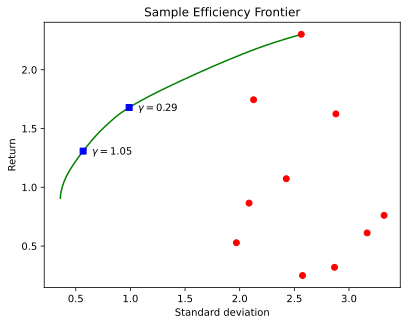

In [24]:
# Plot long only trade-off curve.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, "g-")
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], "bs")
    ax.annotate(
        r"$\gamma = %.2f$" % gamma_vals[marker],
        xy=(risk_data[marker] + 0.08, ret_data[marker] - 0.03),
    )
for i in range(n):
    plt.plot(cp.sqrt(sigma[i, i]).value, mu[i], "ro")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.title("Sample Efficiency Frontier")
plt.show()

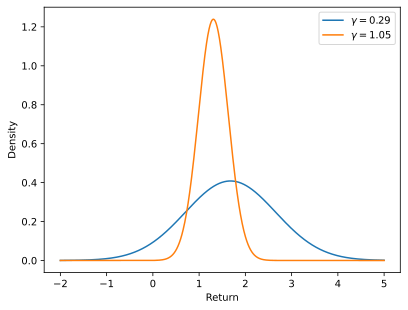

In [25]:
# Plot return distributions for two points on the trade-off curve.
plt.figure()
for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    plt.plot(
        x,
        spstats.norm.pdf(x, ret.value, risk.value),
        label=r"$\gamma = %.2f$" % gamma.value,
    )

plt.xlabel("Return")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()

# Conclusion
Python allows us to plot the efficiency frontier.